In [163]:
#all of imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = preprocessing.LabelEncoder()
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

Import the housing data as a data frame and ensure that the data is loaded properly.

In [81]:
#import data to a dataframe
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")

In [82]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Drop the "Id" column and any features that are missing more than 40% of their values.

In [83]:
#remove id column
df_train.drop(columns=['Id'])

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [84]:
#remove any features missing more than 40% of data
df_train.dropna(axis=1, thresh=len(df_train)*.4, inplace=True)

In [85]:
#verifying that data has been removed
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


For numerical columns, fill in any missing data with the median value.

In [86]:
#printing all column types
for colname, coltype in df_train.dtypes.iteritems():
    print(colname, coltype)

Id int64
MSSubClass int64
MSZoning object
LotFrontage float64
LotArea int64
Street object
LotShape object
LandContour object
Utilities object
LotConfig object
LandSlope object
Neighborhood object
Condition1 object
Condition2 object
BldgType object
HouseStyle object
OverallQual int64
OverallCond int64
YearBuilt int64
YearRemodAdd int64
RoofStyle object
RoofMatl object
Exterior1st object
Exterior2nd object
MasVnrType object
MasVnrArea float64
ExterQual object
ExterCond object
Foundation object
BsmtQual object
BsmtCond object
BsmtExposure object
BsmtFinType1 object
BsmtFinSF1 int64
BsmtFinType2 object
BsmtFinSF2 int64
BsmtUnfSF int64
TotalBsmtSF int64
Heating object
HeatingQC object
CentralAir object
Electrical object
1stFlrSF int64
2ndFlrSF int64
LowQualFinSF int64
GrLivArea int64
BsmtFullBath int64
BsmtHalfBath int64
FullBath int64
HalfBath int64
BedroomAbvGr int64
KitchenAbvGr int64
KitchenQual object
TotRmsAbvGrd int64
Functional object
Fireplaces int64
FireplaceQu object
GarageType o

C:\Users\brean\AppData\Local\Temp\ipykernel_4004\2228877520.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for colname, coltype in df_train.dtypes.iteritems():


In [87]:
#for loop to replace all numerical values with the median
for col in df_train.columns:
    if (is_numeric_dtype(df_train[col])):
        df_train[col].fillna(df_train[col].median())
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


For categorical columns, fill in any missing data with the most common value (mode).

In [88]:
#for loop to fill any missing strings with the most common value
for col in df_train.columns:
    if df_train[col].dtype == 'object':
            df_train[col].fillna(df_train[col].mode()[0], inplace=True)

df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


Convert the categorical columns to dummy variables.

In [89]:
df_train = pd.get_dummies(df_train, drop_first=True)

In [90]:
df_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0


In [91]:
#checking for nan values
df_train.isnull().sum()

Id                         0
MSSubClass                 0
LotFrontage              259
LotArea                    0
OverallQual                0
                        ... 
SaleCondition_AdjLand      0
SaleCondition_Alloca       0
SaleCondition_Family       0
SaleCondition_Normal       0
SaleCondition_Partial      0
Length: 238, dtype: int64

In [92]:
#removing nan values
df_train = df_train.dropna()

In [93]:
df_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,0,1,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,0,1,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,0,1,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,0,1,0,0,0,1,0


Split the data into a training and test set, where the SalePrice column is the target.

In [94]:
#splitting data into one with just saleprice and one without
x = df_train.drop(['SalePrice'], axis=1)
y = df_train['SalePrice']

In [95]:
#train/test split with 30/70 split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

Run a linear regression and report the R2-value and RMSE on the test set.

In [97]:
#ran linear regression and predict
lin_reg = LinearRegression()
lin_reg = lin_reg.fit(x_train, y_train)
pred = lin_reg.predict(x_test)

In [98]:
#report out RMSE
rmse = np.sqrt(mean_squared_error(y_test, pred))
print('RMSE:', rmse)

RMSE: 57262.9430145448


In [99]:
#report out r2-value
r2 = r2_score(y_test, pred)
print('R2:',r2)

R2: 0.4602795692257561


Fit and transform the training features with a PCA so that 90% of the variance is retained (see section 9.1 in the Machine Learning with Python Cookbook)

In [100]:
#scaler = StandardScaler()????+
pca = PCA(n_components=0.9, whiten=True)
features = StandardScaler().fit_trainsform(x_train)
x_train_pca = pca.fit_transform(features)

How many features are in the PCA-transformed matrix?

In [101]:
print(x_train_pca.shape[1])

1


Transform but DO NOT fit the test features with the same PCA.

In [102]:
x_train_pca_2 = pca.transform(x_train)

Repeat step 7 with your PCA transformed data: 
    Run a linear regression and report the R2-value and RMSE on the test set.

In [103]:
x_test_pca = pca.transform(x_test)
lin_reg = lin_reg.fit(x_train_pca, y_train)
pred = lin_reg.predict(x_test_pca)

In [104]:
mean_squared_error_pca = np.sqrt(mean_squared_error(y_test, pred))
r2_pca = r2_score(y_test, pred)
print('RMSE:', mean_squared_error_pca)
print('R2:',r2_pca)

RMSE: 101021.82987582455
R2: -0.6797783933406478


Take your original training features (from step 6) and apply a min-max scaler to them.

In [105]:
scaler.fit(x_train)
x_train_scaler = scaler.transform(x_train)
x_test_scaler = scaler.transform(x_test)

Find the min-max scaled features in your training set that have a variance above 0.1 (see Section 10.1 in the Machine Learning with Python Cookbook).

In [106]:
thresh = VarianceThreshold(threshold=.1)

In [107]:
var1 = thresh.fit_transform(x_train_scaler)

In [108]:
var1[0:3]

array([[0.13333333, 0.5       , 1.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 1.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 1.        , 0.        , 0.        , 1.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 1.        , 1.        ],
       [0.41666667, 0.25      , 1.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 1.        , 1.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 1.        , 0.        , 0. 

Transform but DO NOT fit the test features with the same steps applied in steps 11 and 12.

In [109]:
model_linear_regression = LinearRegression()
model_linear_regression.fit(x_train_scaler, y_train)
y_pred = model_linear_regression.predict(x_test_scaler)

ValueError: X has 237 features, but LinearRegression is expecting 45 features as input.

Repeat step 7 with the high variance data:
    Run a linear regression and report the R2-value and RMSE on the test set.

In [ ]:
mean_squared_error_scaled = np.sqrt(mean_squared_error(y_test, y_pred))
r2_scaled = r2_score(y_test, y_pred)
print(f'RMSE: {mean_squared_error_scaled}')
print(f'R2: {r2_scaled}')

Summarize your findings.

Import the data as a data frame and ensure it is loaded correctly.

In [121]:
#importing data to df
df_m = pd.read_csv("mushrooms.csv")
df_m.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [122]:
#looking for a full list of the column names
df_m.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

Convert the categorical features (all of them) to dummy variables.

In [124]:
df_m['class'] =  label_encoder.fit_transform(df_m['class'])

In [125]:
df_col = list(df_m.columns)

In [127]:
for i in range(len(df_col)):
    df_m[df_col[i]] = LabelEncoder().fit_transform(df_m[df_col[i]])

In [128]:
df_m.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


Split the data into a training and test set.

In [129]:
x = df_m.drop(['class'], axis = 1)
y = df_m['class']

In [130]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

Fit a decision tree classifier on the training set.

In [133]:
train_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 0)

In [134]:
train_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

Report the accuracy and create a confusion matrix for the model prediction on the test set.

In [135]:
y_pred_tree = train_tree.predict(x_test)

In [136]:
print(accuracy_score(y_test,y_pred_tree))

0.9614438063986874


In [137]:
print(confusion_matrix(y_test,y_pred_tree))

[[1208   64]
 [  30 1136]]


Create a visualization of the decision tree.

[Text(0.5, 0.875, 'x[8] <= 3.5\ngini = 0.499\nsamples = 5686\nvalue = [2936, 2750]'),
 Text(0.25, 0.625, 'x[20] <= 3.5\ngini = 0.276\nsamples = 2313\nvalue = [383, 1930]'),
 Text(0.125, 0.375, 'x[19] <= 1.5\ngini = 0.214\nsamples = 411\nvalue = [361, 50]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 34\nvalue = [0, 34]'),
 Text(0.1875, 0.125, 'gini = 0.081\nsamples = 377\nvalue = [361, 16]'),
 Text(0.375, 0.375, 'x[10] <= 2.0\ngini = 0.023\nsamples = 1902\nvalue = [22, 1880]'),
 Text(0.3125, 0.125, 'gini = 0.009\nsamples = 1889\nvalue = [9, 1880]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.75, 0.625, 'x[19] <= 1.5\ngini = 0.368\nsamples = 3373\nvalue = [2553, 820]'),
 Text(0.625, 0.375, 'x[10] <= 0.5\ngini = 0.215\nsamples = 481\nvalue = [59, 422]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 59\nvalue = [59, 0]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 422\nvalue = [0, 422]'),
 Text(0.875, 0.375, 'x[7] <= 0.5\ngini = 0.237\nsamples = 2892\nvalu

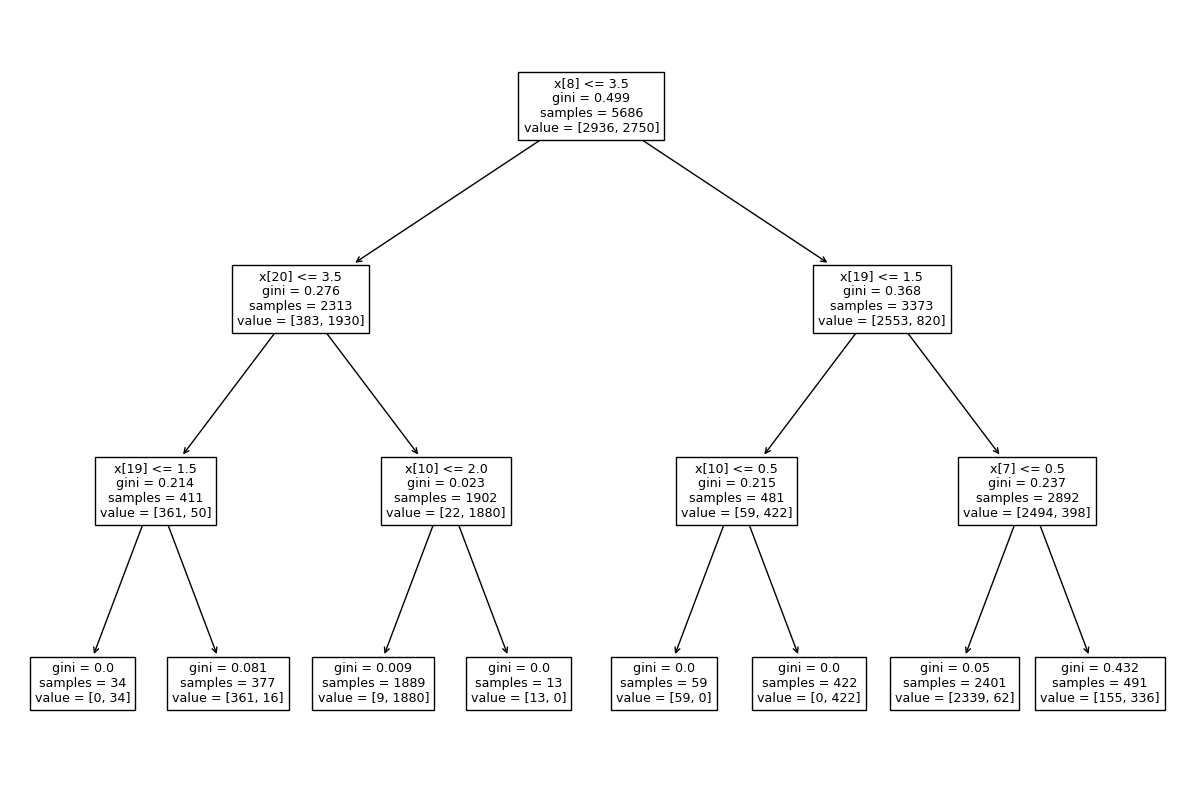

In [145]:
plt.figure(figsize=(15,10))
tree.plot_tree(train_tree.fit(x_train,y_train))

Use a χ2-statistic selector to pick the five best features for this data (see section 10.4 of the Machine Learning with Python Cookbook).


In [150]:
sel_bes = SelectKBest(score_func = chi2, k=5)

In [151]:
sel_bes.fit(x.fillna(0),y)

SelectKBest(k=5, score_func=<function chi2 at 0x000001F499065700>)

Which five features were selected in step 7? Hint: Use the get_support function.

In [154]:
print(x.columns[sel_bes.get_support()].to_numpy())

['bruises' 'gill-size' 'gill-color' 'stalk-root' 'ring-type']


In [156]:
xx = sel_bes.transform(x)

In [157]:
xx = pd.DataFrame(xx)

Repeat steps 4 and 5 with the five best features selected in step 7.

In [160]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(xx, y, test_size=0.3, random_state=0)

In [164]:
train_tree2 = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 0)

In [165]:
train_tree2(x_train2, y_train2)

TypeError: 'DecisionTreeClassifier' object is not callable

In [166]:
y_pred_tree2 = train_tree2.predict(x_test2)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
print(accuracy_score(y_test2, y_pred_tree2))

In [ ]:
print(confusion_matrix(y_test2, y_pred_tree2)

Summarize your findings.